In [1]:
from modules.imports import * 
from modules.utils import *

In [2]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Non Weighted Tests

In [6]:
def train_non_weighted_model(model_fn, model_name, X_train,  y_train, X_test, y_test, epochs=100, batch_size=32, threshold=0.5):
    
    
    model = model_fn()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle = True, callbacks = [early_stopping])
    
    
    y_pred = evaluate_model_performance(model, X_test, y_test, threshold=threshold, model_name=model_name)
    y_probs = model.predict(X_test)
    
    
    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=model_name)
    plot_roc_curve(y_test, y_probs, model_name=model_name)
    plot_learning_curves(history, model_name=model_name)
    #plot_precision_recall_vs_threshold(y_test, y_probs, model_name=model_name
#     model.save(f"{model_name}.keras")
    
    return model, history, y_pred, y_probs

In [7]:
def build_single_layer_cnn_1():
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def build_single_layer_cnn_2():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



def build_single_layer_cnn_3():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def build_multi_layer_cnn_1():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def build_multi_layer_cnn_2():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_multi_layer_cnn_3():
    model = Sequential()
    model.add(Conv1D(128, kernel_size=3, activation='relu', padding='same',  input_shape=(X_train.shape[1], 1)))
    # model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.8194 - loss: 0.4310 - val_accuracy: 0.8684 - val_loss: 0.2948
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - accuracy: 0.8752 - loss: 0.2738 - val_accuracy: 0.8775 - val_loss: 0.2578
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.8805 - loss: 0.2511 - val_accuracy: 0.8825 - val_loss: 0.2410
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.8830 - loss: 0.2401 - val_accuracy: 0.8872 - val_loss: 0.2331
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.8854 - loss: 0.2334 - val_accuracy: 0.8889 - val_loss: 0.2291
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.8875 - loss: 0.2289 - val_accuracy: 0.8901 - val_loss: 0.2244
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.8890 - loss: 0.2252 - val_accuracy: 0.8916 - val_loss: 0.2215
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 

<Figure size 640x480 with 0 Axes>

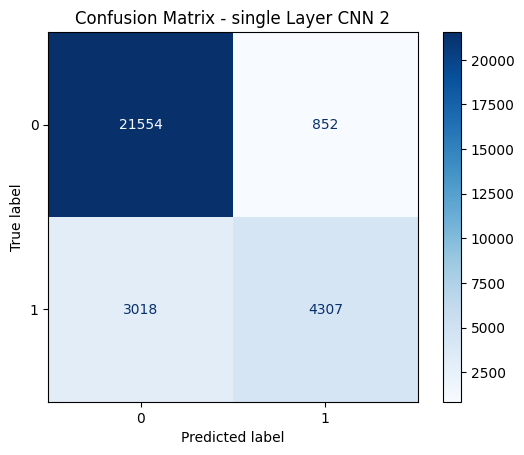

single Layer CNN 2 Metrics:
Accuracy: 0.8698
Precision: 0.8349
Recall: 0.5880
F1 Score: 0.6900
ROC-AUC Score: 0.9282


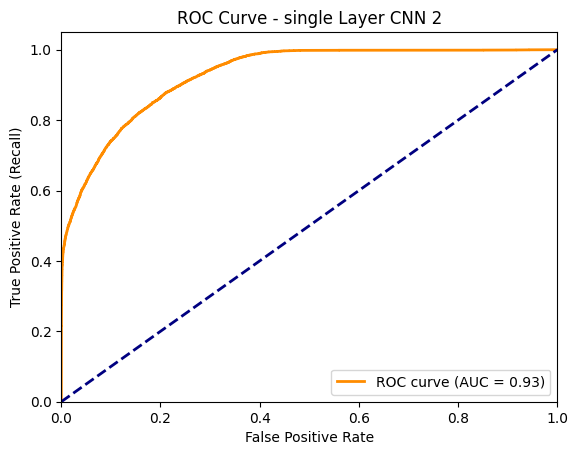

single Layer CNN 2 ROC-AUC Score: 0.93


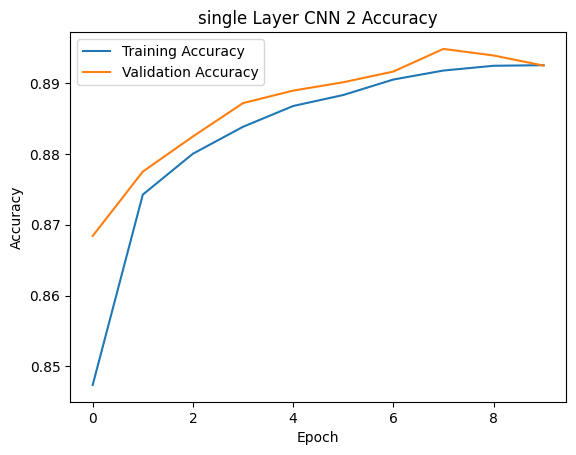

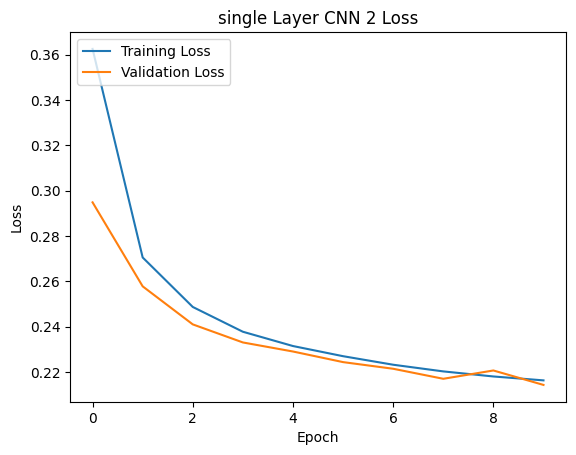

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.8167 - loss: 0.4190 - val_accuracy: 0.8672 - val_loss: 0.2774
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.8736 - loss: 0.2626 - val_accuracy: 0.8771 - val_loss: 0.2396
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.8859 - loss: 0.2341 - val_accuracy: 0.8929 - val_loss: 0.2207
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.8934 - loss: 0.2181 - val_accuracy: 0.8994 - val_loss: 0.2122
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.8951 - loss: 0.2133 - val_accuracy: 0.9020 - val_loss: 0.2073
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.8990 - loss: 0.2074 - val_accuracy: 0.9015 - val_loss: 0.2032
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.8975 - loss: 0.2059 - val_accuracy: 0.9025 - val_loss: 0.2029
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - accuracy: 0.8997 - los

<Figure size 640x480 with 0 Axes>

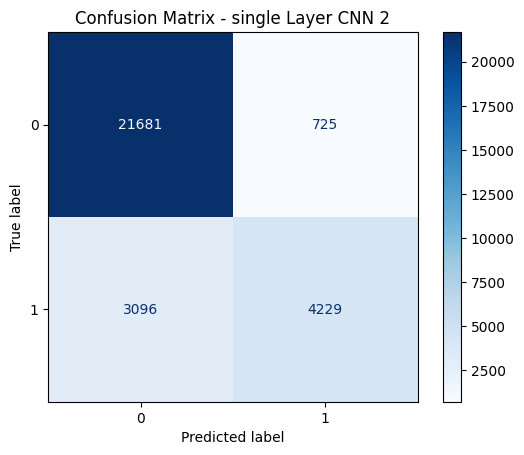

single Layer CNN 2 Metrics:
Accuracy: 0.8715
Precision: 0.8537
Recall: 0.5773
F1 Score: 0.6888
ROC-AUC Score: 0.9345


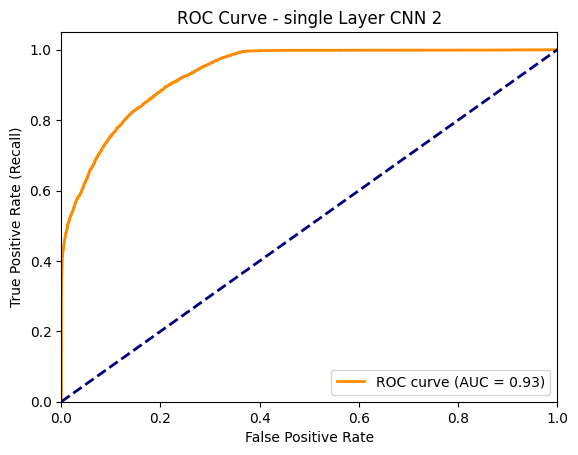

single Layer CNN 2 ROC-AUC Score: 0.93


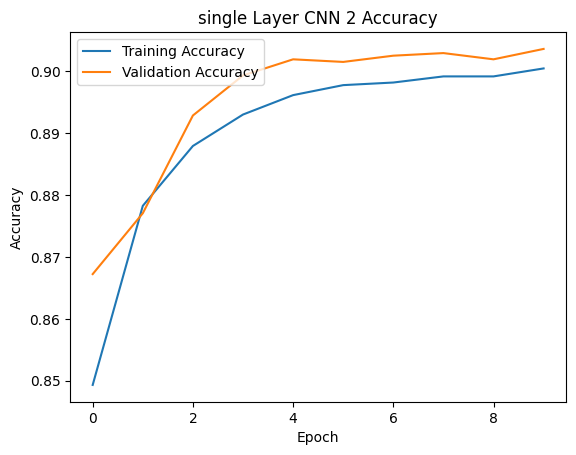

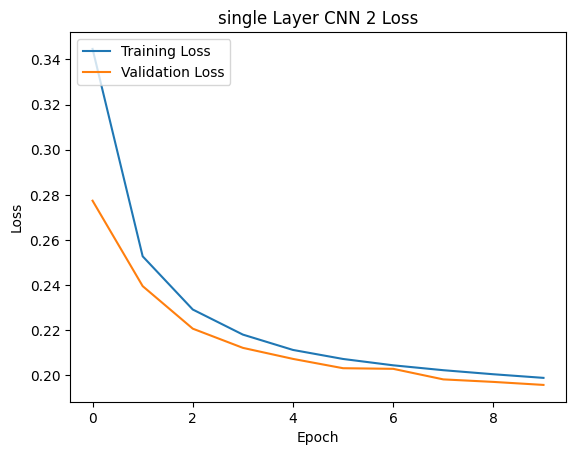

Epoch 1/100


/Users/bhupindergosal/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3345/3345 ━━━━━━━━━━━━━━━━━━━━ 2s 380us/step - accuracy: 0.8378 - loss: 0.3770 - val_accuracy: 0.8803 - val_loss: 0.2438
Epoch 2/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8869 - loss: 0.2360 - val_accuracy: 0.8815 - val_loss: 0.2280
Epoch 3/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.8919 - loss: 0.2206 - val_accuracy: 0.8914 - val_loss: 0.2166
Epoch 4/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.8951 - loss: 0.2127 - val_accuracy: 0.8979 - val_loss: 0.2091
Epoch 5/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.8955 - loss: 0.2113 - val_accuracy: 0.9005 - val_loss: 0.2066
Epoch 6/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8969 - loss: 0.2047 - val_accuracy: 0.8967 - val_loss: 0.2034
Epoch 7/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - accuracy: 0.8986 - loss: 0.2031 - val_accuracy: 0.9020 - val_loss: 0.1978
Epoch 8/100
3345/3345 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9003 - los

<Figure size 640x480 with 0 Axes>

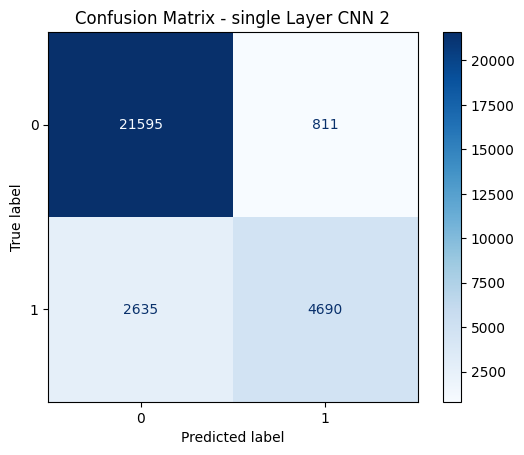

single Layer CNN 2 Metrics:
Accuracy: 0.8841
Precision: 0.8526
Recall: 0.6403
F1 Score: 0.7313
ROC-AUC Score: 0.9522


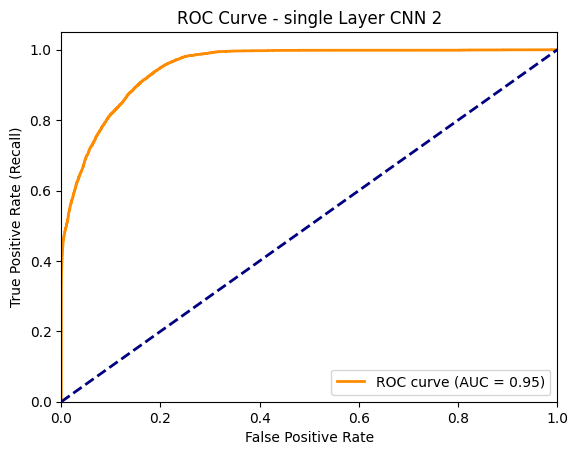

single Layer CNN 2 ROC-AUC Score: 0.95


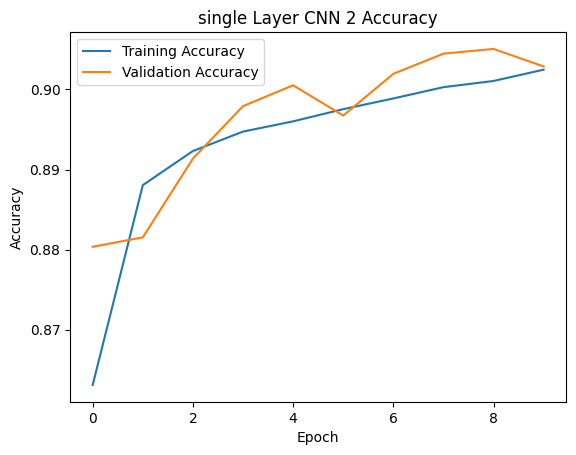

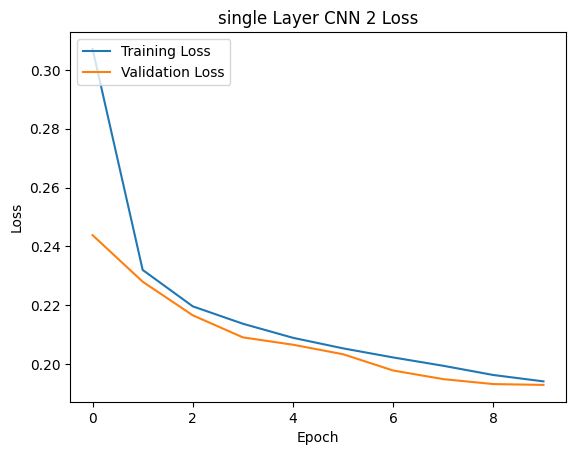

(<Sequential name=sequential_6, built=True>,
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int32),
 array([[6.1848812e-02],
        [7.8760779e-05],
        [1.7301354e-01],
        ...,
        [7.5518568e-05],
        [4.4629915e-06],
        [1.3674176e-03]], dtype=float32))

In [9]:
train_non_weighted_model(build_single_layer_cnn_1, 'single Layer CNN 2', X_train, y_train, X_test, y_test)
train_non_weighted_model(build_single_layer_cnn_2, 'single Layer CNN 2', X_train, y_train, X_test, y_test)
train_non_weighted_model(build_single_layer_cnn_3, 'single Layer CNN 2', X_train, y_train, X_test, y_test)

# train_non_weighted_model(build_multi_layer_cnn_1, 'Multi Layer CNN 2', X_train, y_train, X_test, y_test)
# train_non_weighted_model(build_multi_layer_cnn_2, 'Multi Layer CNN 2', X_train, y_train, X_test, y_test)
# train_non_weighted_model(build_multi_layer_cnn_3, 'Multi Layer CNN 2', X_train, y_train, X_test, y_test)

In [ ]:
def build_multi_layer_cnn_simplified():
    model = Sequential()
    
    
    model.add(Conv1D(16, kernel_size=2, activation='relu', input_shape=(8, 1)))
    
    
    #model.add(MaxPooling1D(pool_size=2))
    
    
    model.add(Flatten())
    
    
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Flatten())
   
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model